# ELE 435/535 Computational Lab 4

### Due Date: 10/15/2018 (Monday) 11:59 PM
### Name:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

##  ** Regression

### Q1) Housing Dataset:

In this part, we will be working with a dataset that contains house prices in suburbs of Boston. The data contains 14 columns, the first 13 of which correspond to different housing-related features , such as "CRIM" (crime rate per capita), "RM" (average number of rooms), "TAX" (tax rate), etc. A more comprehensive description can be found at https://archive.ics.uci.edu/ml/datasets/Housing. The last column corresponds to  median value of owner-occupied homes in $1000's. 

1-1) Using linear regression, find a vector "w" that specifies a weighting of each attribute for predicting the price of a house (median value in $1000's, similar to the last column of data). Print vector w.

In [66]:
housing_data = np.loadtxt('housing.data')
X = np.matrix(housing_data[:,0:13])
y = np.matrix(housing_data[:,13]).T

In [74]:
u, s, vh = np.linalg.svd(X, full_matrices=False)
s = np.diag(1/s)

In [75]:
Wtemp = np.matmul(vh.T,s)
Wtemp2 = np.matmul(Wtemp,u.T)
W = np.matmul(Wtemp2,y)

In [76]:
W

matrix([[-9.28965170e-02],
        [ 4.87149552e-02],
        [-4.05997958e-03],
        [ 2.85399882e+00],
        [-2.86843637e+00],
        [ 5.92814778e+00],
        [-7.26933458e-03],
        [-9.68514157e-01],
        [ 1.71151128e-01],
        [-9.39621540e-03],
        [-3.92190926e-01],
        [ 1.49056102e-02],
        [-4.16304471e-01]])

In [84]:
y_tilda = np.matmul(X,W)

1-2) Using vector w from the previous part, print the mean squared error of predicting house prices.

In [88]:
y_tilda = np.matmul(X,W)
error = y - y_tilda
error_sq = np.square(error)
meanSqError = np.mean(error_sq)
print('mean squared error is',meanSqError)

mean squared error is 24.166099330126492


### Q2) Physicochemical Properties of Protein Tertiary Structure Data Set:

In this part, we will be working with a new dataset that quantifies protein tertiary structure.
There are 45730 decoys with size varying from 0 to 21 angstrom. Each example contains 9 features. More information can be found at https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure#. 

First, we will import data into numpy using the following code. Afterwads, data is split into trainingg/test sets. 
The goal is to learn a vector "w" (using linear regression on the training data) to predict the size of a test-decoy based on its 9 features. 

In [89]:
Protein_data = np.loadtxt('Protein.txt')
train_X = np.matrix(Protein_data[0:40000,1:]) # Dictionary that contains features for training samples
train_y = np.matrix(Protein_data[0:40000,0]).T # Size of decoy for each training sample (a real number)

test_X = np.matrix(Protein_data[40000:,1:]) # Dictionary that contains features for test samples
test_y = np.matrix(Protein_data[40000:,0]).T # Size of decoy for each test sample (a real number)

Q2-1) Based on train_X and train_y, find the corresponding vector "w" (using linear regression) and print it.

In [94]:
u, s, vh = np.linalg.svd(train_X, full_matrices=False)
s = np.diag(1/s)
Wtemp = np.matmul(vh.T,s)
Wtemp2 = np.matmul(Wtemp,u.T)
W = np.matmul(Wtemp2,train_y)
W

matrix([[ 1.82919845e-03],
        [ 7.93316713e-04],
        [ 2.46155609e+01],
        [-1.05302864e-01],
        [-3.85363213e-06],
        [-2.50966502e-02],
        [-1.15479761e-04],
        [ 1.46576918e-02],
        [-2.61397924e-02]])

Q2-2) Using vector "w" from the previous part, predict the size of decoys for test samples (test_X). What is the mean squared error between the predicted values and the actual sizes (train_y)?

In [97]:
y_tilda = np.matmul(test_X,W)
error = test_y - y_tilda
error_sq = np.square(error)
meanSqError = np.mean(error_sq)
print('mean squared error is',meanSqError)

mean squared error is 27.014124666488897


### Q3) Understanding Overfitting:

In this part, we will work on an example that helps us understand the problems with overfitting. 
First, we will pick 10 samples of a sin wave using the following commands.

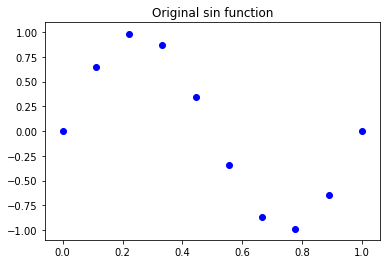

In [273]:
Num_points = 10
x = np.linspace(0, 1, Num_points)
signal = np.sin(2*np.pi*x)
plt.figure()
plt.scatter(x, signal, color = (0,0,1))
plt.title('Original sin function')
plt.show()

Then, we are going to add Gaussian noise to the original samples.

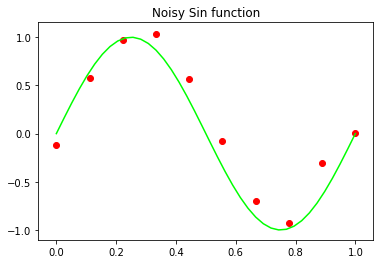

In [274]:
sigma = 0.15
mu = 0.1
noise = sigma * np.random.randn(Num_points) + mu
corrupt_signal = signal + noise

plt.figure()
plt.scatter(x, corrupt_signal, color = (1,0,0))
plt.plot(np.linspace(0, 1, Num_points*4),np.sin(2*np.pi*(np.linspace(0, 1, Num_points*4)))
         ,color=(0,1,0))
plt.title('Noisy Sin function')
plt.show()

In [124]:
corrupt_signal

array([-0.12377971,  0.68391429,  1.26161327,  1.17756561,  0.19935436,
       -0.44736261, -0.72758419, -1.2243717 , -0.45552193, -0.13498626])

In [275]:
x

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

Now, using regression, fit polynomials of different degrees (degree=0 up to degree=9) to the noisy samples (noisy samples come from "corrupt_signal" in the code above). Plot the corresponding polynomials along with the original sin function (10 different plots, in total). Describe what happens as you fit a more complex polynomial to your data.

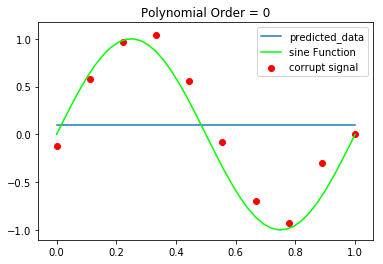

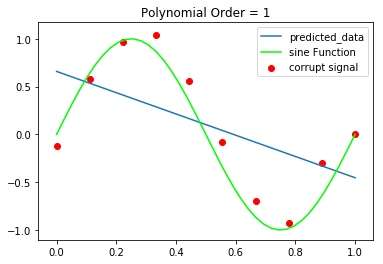

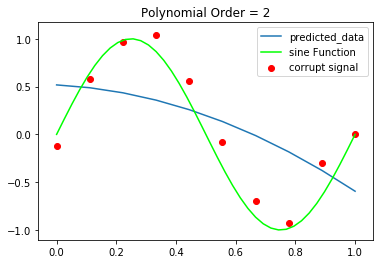

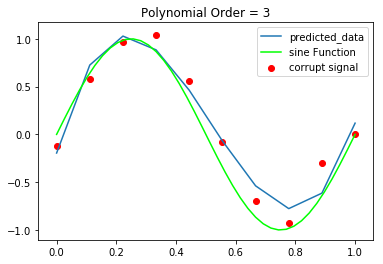

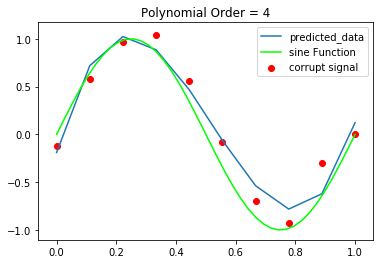

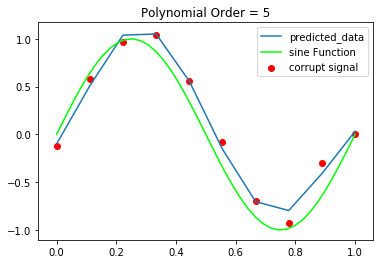

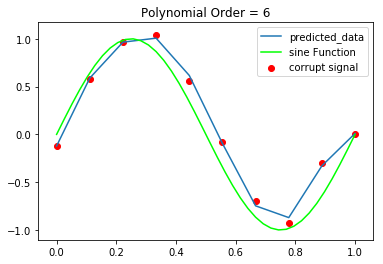

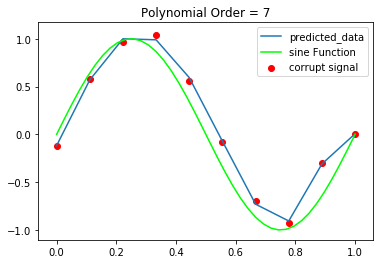

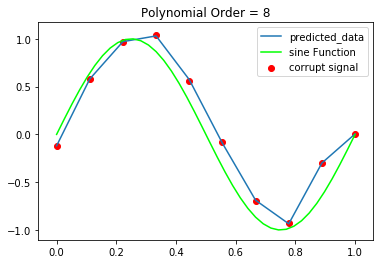

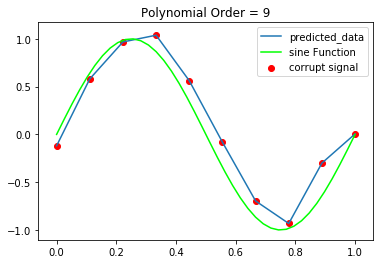

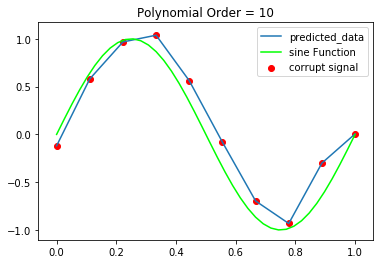

In [280]:
max_poly_order = 11
for polynomial_order in range(0,max_poly_order):
    features = np.ones_like(x);
    if polynomial_order >0:
        for order in range(1,polynomial_order+1):
            this_feature = np.power(x,order)
            features = np.vstack((features,this_feature))
        
        features = features.T
        u, s, vh = np.linalg.svd(features, full_matrices=False)
        s = np.diag(1/s)
        Wtemp = np.matmul(vh.T,s)
        Wtemp2 = np.matmul(Wtemp,u.T)
        W = np.matmul(Wtemp2,corrupt_signal)
#         print(W)
#         print(polynomial_order)
#         print("="*55)
        predicted_labels =  np.matmul(features,W)
    else:
        W = np.mean(corrupt_signal)
        predicted_labels =  features*W
    
    plt.figure()
    plt.plot(x,predicted_labels)
    plt.plot(np.linspace(0, 1, Num_points*4),np.sin(2*np.pi*(np.linspace(0, 1, Num_points*4)))
         ,color=(0,1,0))
    plt.scatter(x, corrupt_signal, color = (1,0,0))

    plt.gca().legend(('predicted_data', 'sine Function','corrupt signal'))
    title_pol_order = str(polynomial_order)
    plt.title("Polynomial Order = " + title_pol_order )
        

## We can see that as we increase the polynomial order, the regression model tries to fit all the data points in the corrupted signal and does not generalize to the true data. This leads to overfitting. It can be seen that the model estimates the underlying distribution best when the polynomial order is not too high. We would have to use cross validation to determine the best degree of polynomial to use. For this case, we have a total of 10 data points, so a polynomial of higher order such as 9 and 10 will have degree of freedom same aas the data and it will have coefficients such that it satisfies all the data points.

### Q4) Collaborative Representation Based Classification:

The goal of this part is to use regression for classifiying data. We will be working with the subset of MNIST that was used for HW1. The training data contains 10,000 samples of different digits. Let's call it matrix D (of dimension 784 * 10000). The first 1000 columns of D correspond to digit 0 ($D_0$), the next 1000 correspond to digit 1 ($D_1$), etc. 

Now, given any new example (x), we would like to represent it as a linear combination of columns of D (hence, the name representation based classification). This can be acheived by finding a vector w (of dimension 10,000) that satisfies; $w = \arg\min \hspace{2mm} \|Dw - x \|_2$.
The first 1000 elements of w ($w_0$) quantify how much of each column from digit 0 are needed to represent x. Similarly, the next 1000 elements ($w_1$) correspond to weights on $D_1$, etc.
(Hint: Getting w directly from normal equation of D is time-consuming, SVD will help to speed up the calculation)

Next, prediction of pixel values of any test image (x) based only on examples of a particual digit $i$ can be found using $y_i' = D_i \times w_i$. Then, k-th digit that yields the lowest mean squared prediction error (i.e., $k = \arg\min \hspace{2mm} \|y -y'_i \|_2$) will determine the label of x. 


Follow the procedure above to predict the labels of each test example. What is the corresponding testing accuracy?

In [189]:
# Regression-based classification
train_data = np.load('MNISTcwtrain1000.npy')
train_data = train_data.astype(dtype='float64')
test_data = np.load('MNISTcwtest100.npy')
test_data = test_data.astype(dtype='float64')

train_data = train_data/255.0
test_data = test_data/255.0


In [190]:
train_data.shape

(784, 10000)

In [192]:
u, s, vh = np.linalg.svd(train_data, full_matrices=False)
s = np.diag(1/s)

In [193]:
test_data.shape

(784, 1000)

In [256]:
predicted_labels = []
for i in range(test_data.shape[1]*0,test_data.shape[1]):
    predicted_weights = np.matmul(vh.T,s)
    predicted_weights = np.dot(predicted_weights,u.T)
    predicted_weights = np.dot(predicted_weights,test_data[:,i])
    predicted_weights = predicted_weights.reshape((-1,1))
    predicted_wt_for_digit = np.zeros((test_data.shape[0],10))
#     wt_for_digit = np.reshape(predicted_weights,(1000,10))
    for digit in range(0,10):
        relevant_training_data_this_digit = train_data[:,digit*1000:(digit+1)*1000]
        relevant_wt_for_this_digit = predicted_weights[digit*1000:(digit+1)*1000,0]
        predicted_pixels = np.dot(relevant_training_data_this_digit,relevant_wt_for_this_digit)
        predicted_wt_for_digit[:,digit] = predicted_pixels
    true_pixel = test_data[:,i]
    true_pixel = np.reshape(true_pixel,(-1,1))
    error_for_each_digit = predicted_wt_for_digit - true_pixel
    error_for_each_digit_sq = np.square(error_for_each_digit)
    error_for_each_digit_sq_rowSum = np.sum(error_for_each_digit_sq,axis=0)
    predicted_label = np.argmin(error_for_each_digit_sq_rowSum)
    predicted_labels.append(predicted_label)

        
    

In [258]:
correct_test_label = [] 
for j in range (0,10):
    correct_test_label += [j]*100

In [271]:
predicted_labels_np = np.asarray(predicted_labels)
correct_test_label_np = np.asarray(correct_test_label)
correct_predictions = predicted_labels_np == correct_test_label_np
accuracy = np.sum(correct_predictions)/correct_predictions.shape[0]
print("Test Accuracy is", accuracy*100, '%')

Test Accuracy is 86.0 %
